In [68]:
import pickle
import pandas as pd
import seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
DATE = '20231104'

QPATH = 'Quantlet/4-seq2seq'

import sys
IN_COLAB = 'google.colab' in sys.modules

import os
if IN_COLAB:
  os.chdir(f'/content/drive/MyDrive/ColabNotebooks/IRTG/Encode_the_Qode/Encode-the-Qode/{QPATH}')

In [6]:
with open(f'../../data/preprocessed/Quantlet/{DATE}/results_dict.pickle', 'rb') as handle:
    results_dict = pickle.load(handle)

In [35]:
def parse_to_df(results_dict: dict) -> pd.DataFrame:
  full_results = pd.DataFrame()
  for run in results_dict.keys():
    results_df = pd.DataFrame(results_dict[run])
    results_df['run'] = str(run)
    full_results = pd.concat([full_results, results_df], axis=0)

  full_results['steps'] = full_results.index
  full_results = full_results.reset_index(drop=True)

  stacked_df = pd.DataFrame()
  for variable in ['training_rouge', 'evaluation_rouge', 'training_loss', 'evaluation_loss']:
      tr_df = full_results[[variable, 'run', 'steps']]
      tr_df['variable'] = variable
      tr_df = tr_df.rename(columns={variable : 'value'})
      stacked_df = pd.concat([stacked_df, tr_df], axis=0)
  return stacked_df

In [ ]:
results_df = parse_to_df(results_dict)

In [39]:
results_df[results_df.run=='0']

,value,run,steps,variable
0,0.0156,0,0,training_rouge
1,0.1667,0,1,training_rouge
2,0.1056,0,2,training_rouge
3,0.1364,0,3,training_rouge
4,0.0455,0,4,training_rouge
...,...,...,...,...
16,5.3765793,0,16,evaluation_loss
17,4.156812,0,17,evaluation_loss
18,3.8101625,0,18,evaluation_loss
19,4.8405313,0,19,evaluation_loss


In [43]:
any(results_df.isna())

True

In [57]:
results_df.value = results_df.value.astype(np.float32)

In [65]:
rouge_df = results_df.query('variable.str.contains("rouge")')
loss_df = results_df.query('variable.str.contains("loss")')

<ipython-input-66-f8eae6f6959b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


[Text(0.5, 0, 'Training Epochs'), Text(0, 0.5, 'Value')]

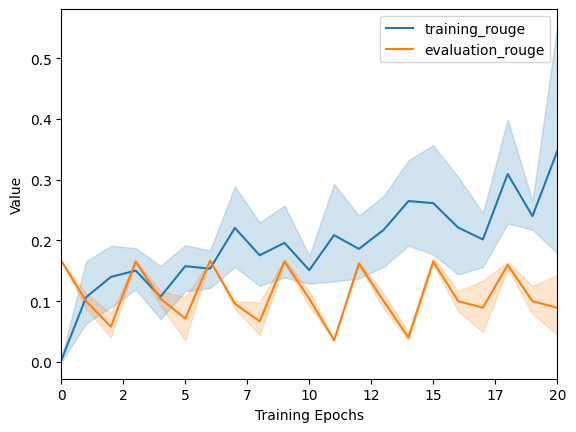

In [66]:
g = sns.lineplot(x="steps", y="value",
             hue="variable", #style="variable",
             data=rouge_df)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 20))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Value')

<ipython-input-67-d3fdad45fa1c>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


[Text(0.5, 0, 'Training Epochs'), Text(0, 0.5, 'Value')]

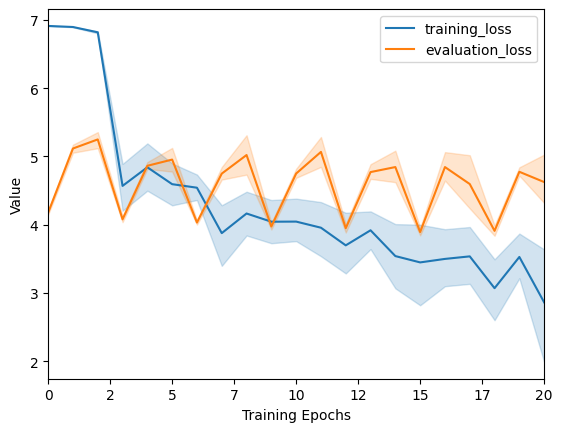

In [67]:
g = sns.lineplot(x="steps", y="value",
             hue="variable", #style="variable",
             data=loss_df)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 20))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Value')

In [83]:
palette_rouge = sns.color_palette("rocket_r", 2)
palette_loss = sns.color_palette("viridis", 2)

<ipython-input-84-8b91c86659d7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)
<ipython-input-84-8b91c86659d7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_xticklabels(xlabels)


[Text(0.5, 0, 'Training Epochs'), Text(0, 0.5, 'Loss')]

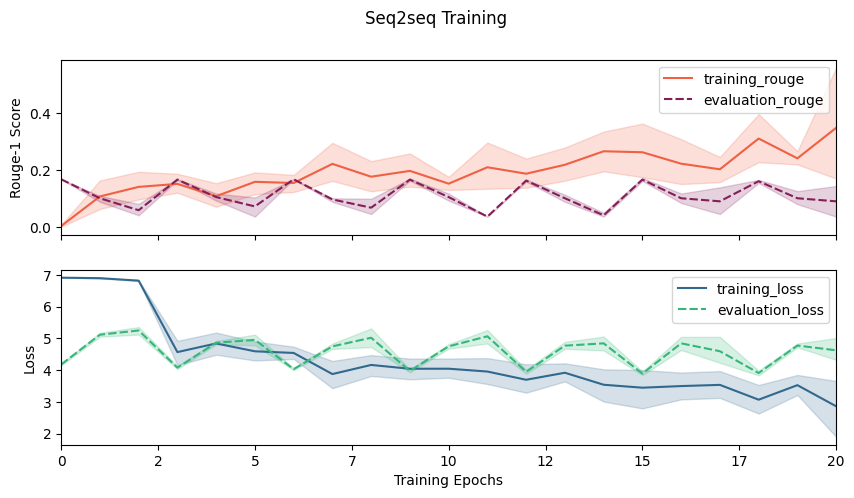

In [84]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
fig.suptitle('Seq2seq Training')

g = sns.lineplot(ax=axes[0], x="steps", y="value",
             hue="variable", style="variable",
             data=rouge_df, palette=palette_rouge)
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (0, 20))
xlabels = [int(x)  for x in g.get_xticks()]
g.set_xticklabels(xlabels)
g.set(xlabel='Training Epochs', ylabel='Rouge-1 Score')

g2 = sns.lineplot(ax=axes[1], x="steps", y="value",
             hue="variable", style="variable",
             data=loss_df, palette=palette_loss)
g2.legend(bbox_to_anchor=(1, 1), ncol=1)
g2.set(xlim = (0, 20))
xlabels = [int(x)  for x in g2.get_xticks()]
g2.set_xticklabels(xlabels)
g2.set(xlabel='Training Epochs', ylabel='Loss')